<a href="https://colab.research.google.com/github/m3204/try/blob/main/Bootstrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Estimating Future Stock Price Probability with Bootstrapping
This Jupyter notebook is a supplementary resource for the article
'Bootstrapping Future Price Movements Probabilities'.
It contains all the code snippets and examples discussed in the article,
providing a hands-on approach to understanding the concepts and techniques presented.
For a comprehensive understanding, please refer to the article at
https://entreprenerdly.com/bootstrapping-future-price-movements-probabilities/


<p align="center">
  <img src="https://entreprenerdly.com/wp-content/uploads/2024/03/logo-com.png" height=120>
</p>

## 1. Define Functions


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Fetch stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Bootstrapping simulation function
def bootstrap_simulation(data, days, n_iterations=10000):
    daily_returns = data.pct_change().dropna()
    simulations = np.zeros((n_iterations, days))

    for i in range(n_iterations):
        sample = np.random.choice(daily_returns, size=days, replace=True)
        simulations[i] = np.cumprod(1 + sample) * data.iloc[-1]

    return simulations

# Historical simulation function
def historical_simulation(data, days, n_iterations=10000):
    daily_returns = data.pct_change().dropna()
    simulations = np.zeros((n_iterations, days))

    for i in range(n_iterations):
        # Instead of resampling, shuffle the daily returns
        shuffled_returns = np.random.permutation(daily_returns)
        sample = shuffled_returns[:days]
        simulations[i] = np.cumprod(1 + sample) * data.iloc[-1]

    return simulations

# Calculate probabilities
def calculate_probabilities(simulations, thresholds):
    final_prices = simulations[:, -1]
    below = np.mean(final_prices < thresholds[0])
    above = np.mean(final_prices > thresholds[1])
    between = np.mean((final_prices >= thresholds[0]) & (final_prices <= thresholds[1]))

    return {'below': below, 'between': between, 'above': above}

## 2. Compute and Plot Distribution Results


[*********************100%%**********************]  1 of 1 completed


Bootstrapping - Probability of falling below 850: 11.50%
Bootstrapping - Probability of falling between 850 and 1000: 41.41%
Bootstrapping - Probability of rising above 1000: 47.09%
Historical - Probability of falling below 850: 11.02%
Historical - Probability of falling between 850 and 1000: 41.49%
Historical - Probability of rising above 1000: 47.49%


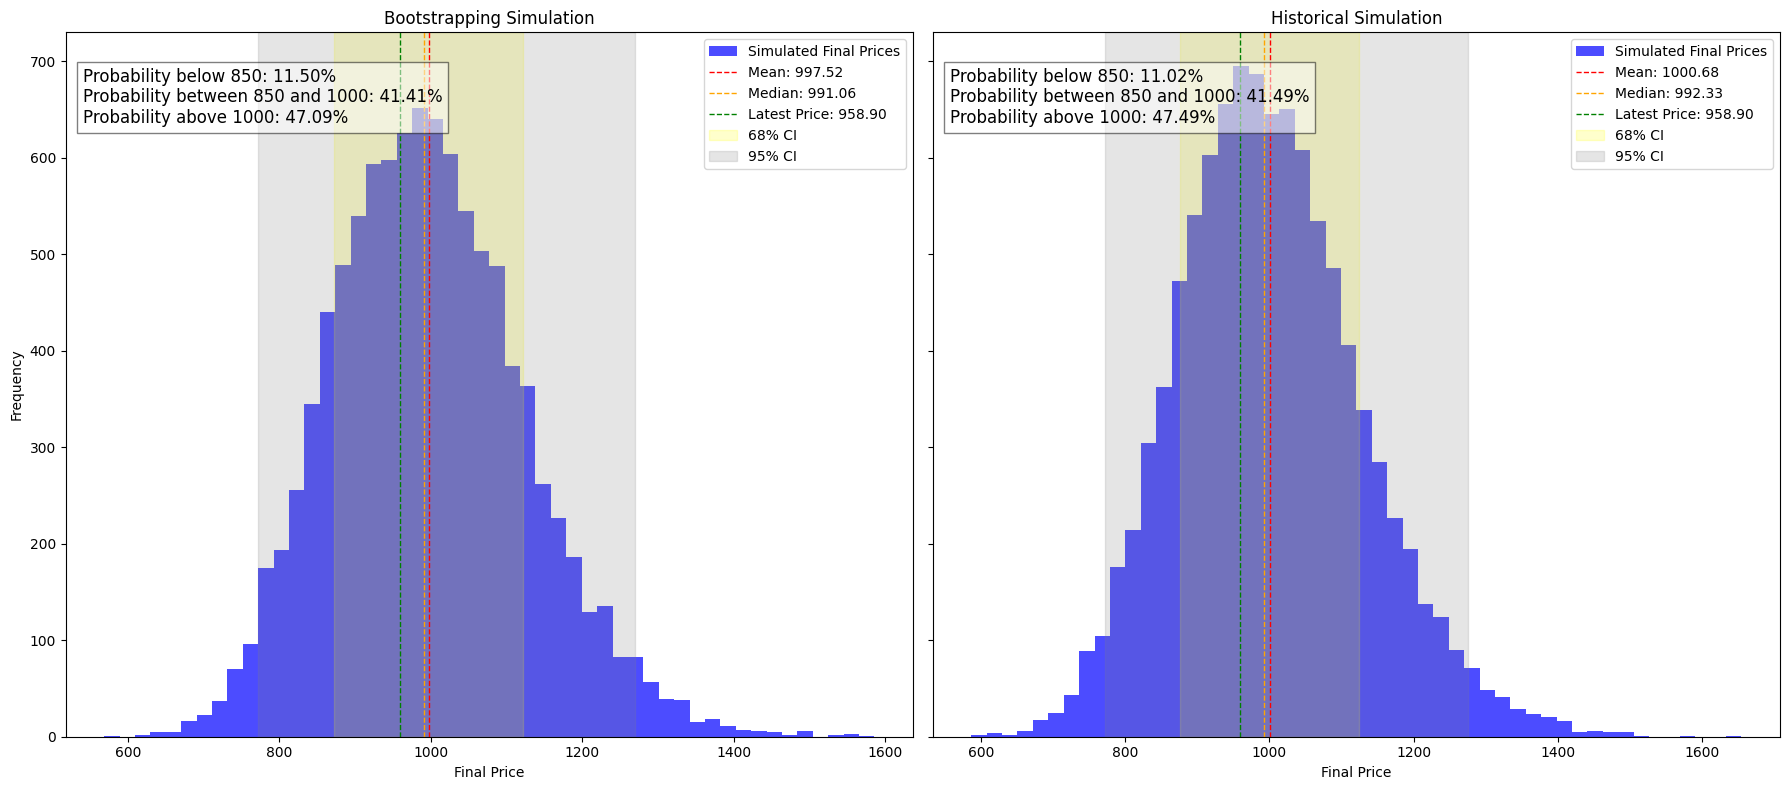

In [ ]:
# Plot distribution
def plot_distributions(bootstrap_simulations, historical_simulations, data, thresholds, bootstrap_probabilities, historical_probabilities):
    final_bootstrap_prices = bootstrap_simulations[:, -1]
    final_historical_prices = historical_simulations[:, -1]

    mean_bootstrap_price = np.mean(final_bootstrap_prices)
    median_bootstrap_price = np.median(final_bootstrap_prices)
    ci_68_bootstrap = np.percentile(final_bootstrap_prices, [16, 84])
    ci_95_bootstrap = np.percentile(final_bootstrap_prices, [2.5, 97.5])

    mean_historical_price = np.mean(final_historical_prices)
    median_historical_price = np.median(final_historical_prices)
    ci_68_historical = np.percentile(final_historical_prices, [16, 84])
    ci_95_historical = np.percentile(final_historical_prices, [2.5, 97.5])

    latest_price = data.iloc[-1]

    fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

    # Plot for Bootstrapping
    axs[0].hist(final_bootstrap_prices, bins=50, color='blue', alpha=0.7, label='Simulated Final Prices')
    axs[0].axvline(mean_bootstrap_price, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_bootstrap_price:.2f}')
    axs[0].axvline(median_bootstrap_price, color='orange', linestyle='dashed', linewidth=1, label=f'Median: {median_bootstrap_price:.2f}')
    axs[0].axvline(latest_price, color='green', linestyle='dashed', linewidth=1, label=f'Latest Price: {latest_price:.2f}')
    axs[0].axvspan(ci_68_bootstrap[0], ci_68_bootstrap[1], color='yellow', alpha=0.2, label='68% CI')
    axs[0].axvspan(ci_95_bootstrap[0], ci_95_bootstrap[1], color='grey', alpha=0.2, label='95% CI')
    axs[0].set_xlabel('Final Price')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Bootstrapping Simulation')
    axs[0].legend(loc='upper right')
    textstr = '\n'.join((
        f'Probability below {thresholds[0]}: {bootstrap_probabilities["below"]:.2%}',
        f'Probability between {thresholds[0]} and {thresholds[1]}: {bootstrap_probabilities["between"]:.2%}',
        f'Probability above {thresholds[1]}: {bootstrap_probabilities["above"]:.2%}'
    ))
    axs[0].text(0.02, 0.95, textstr, transform=axs[0].transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    # Plot for Historical Simulation
    axs[1].hist(final_historical_prices, bins=50, color='blue', alpha=0.7, label='Simulated Final Prices')
    axs[1].axvline(mean_historical_price, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_historical_price:.2f}')
    axs[1].axvline(median_historical_price, color='orange', linestyle='dashed', linewidth=1, label=f'Median: {median_historical_price:.2f}')
    axs[1].axvline(latest_price, color='green', linestyle='dashed', linewidth=1, label=f'Latest Price: {latest_price:.2f}')
    axs[1].axvspan(ci_68_historical[0], ci_68_historical[1], color='yellow', alpha=0.2, label='68% CI')
    axs[1].axvspan(ci_95_historical[0], ci_95_historical[1], color='grey', alpha=0.2, label='95% CI')
    axs[1].set_xlabel('Final Price')
    axs[1].set_title('Historical Simulation')
    axs[1].legend(loc='upper right')
    textstr = '\n'.join((
        f'Probability below {thresholds[0]}: {historical_probabilities["below"]:.2%}',
        f'Probability between {thresholds[0]} and {thresholds[1]}: {historical_probabilities["between"]:.2%}',
        f'Probability above {thresholds[1]}: {historical_probabilities["above"]:.2%}'
    ))
    axs[1].text(0.02, 0.95, textstr, transform=axs[1].transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    plt.show()

# Parameters
ticker = 'ASML.AS'
start_date = '2020-01-01'
end_date = '2025-01-01'
days = 30
thresholds = [850, 1000]  # Example thresholds

# Fetch data
data = get_stock_data(ticker, start_date, end_date)

# Perform bootstrapping simulations
bootstrap_simulations = bootstrap_simulation(data, days)

# Perform historical simulations
historical_simulations = historical_simulation(data, days)

# Calculate probabilities for bootstrapping
bootstrap_probabilities = calculate_probabilities(bootstrap_simulations, thresholds)

# Calculate probabilities for historical simulation
historical_probabilities = calculate_probabilities(historical_simulations, thresholds)

# Print probabilities
print(f"Bootstrapping - Probability of falling below {thresholds[0]}: {bootstrap_probabilities['below']:.2%}")
print(f"Bootstrapping - Probability of falling between {thresholds[0]} and {thresholds[1]}: {bootstrap_probabilities['between']:.2%}")
print(f"Bootstrapping - Probability of rising above {thresholds[1]}: {bootstrap_probabilities['above']:.2%}")

print(f"Historical - Probability of falling below {thresholds[0]}: {historical_probabilities['below']:.2%}")
print(f"Historical - Probability of falling between {thresholds[0]} and {thresholds[1]}: {historical_probabilities['between']:.2%}")
print(f"Historical - Probability of rising above {thresholds[1]}: {historical_probabilities['above']:.2%}")

# Plot distributions side by side
plot_distributions(bootstrap_simulations, historical_simulations, data, thresholds, bootstrap_probabilities, historical_probabilities)


## 3. Plot Distribution on Stock Price

[*********************100%%**********************]  1 of 1 completed


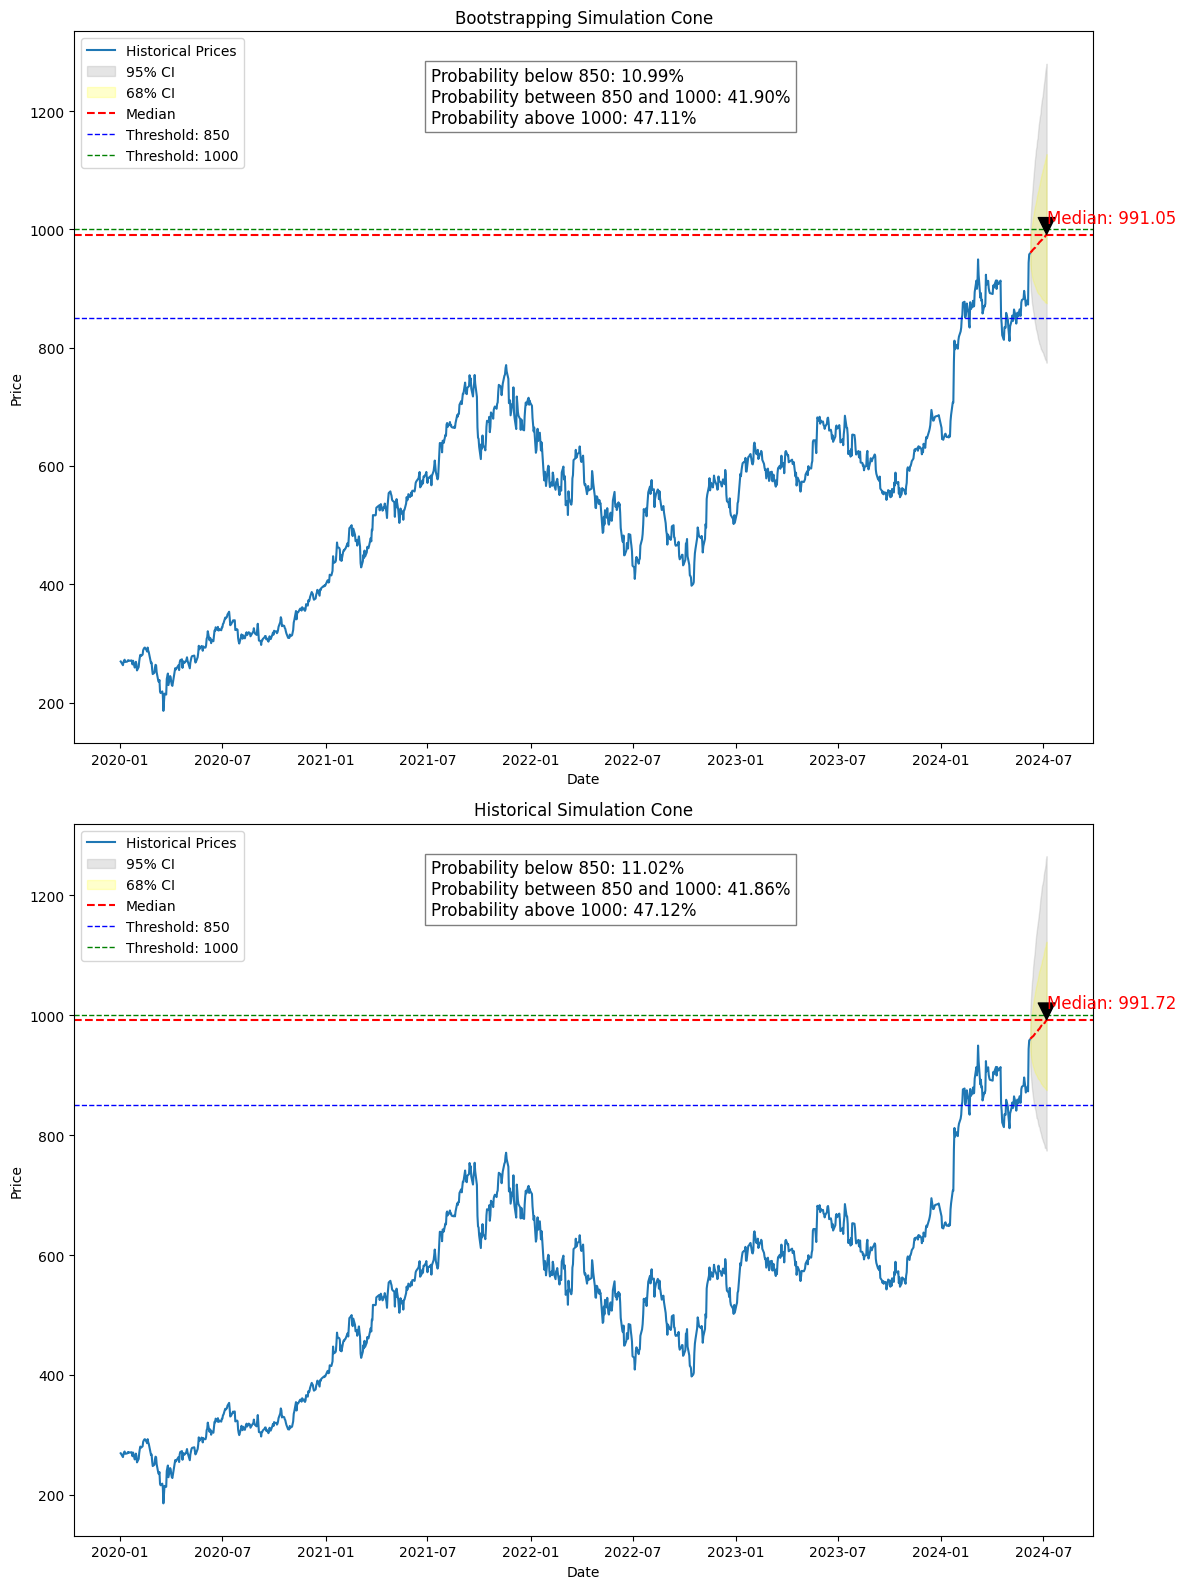

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Fetch stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Bootstrapping simulation function
def bootstrap_simulation(data, days, n_iterations=10000):
    daily_returns = data.pct_change().dropna()
    simulations = np.zeros((n_iterations, days))

    for i in range(n_iterations):
        sample = np.random.choice(daily_returns, size=days, replace=True)
        simulations[i] = np.cumprod(1 + sample) * data.iloc[-1]

    return simulations

# Historical simulation function
def historical_simulation(data, days, n_iterations=10000):
    daily_returns = data.pct_change().dropna()
    simulations = np.zeros((n_iterations, days))

    for i in range(n_iterations):
        sample = np.random.permutation(daily_returns)[:days]
        simulations[i] = np.cumprod(1 + sample) * data.iloc[-1]

    return simulations

# Calculate probabilities
def calculate_probabilities(simulations, thresholds):
    final_prices = simulations[:, -1]
    below = np.mean(final_prices < thresholds[0])
    above = np.mean(final_prices > thresholds[1])
    between = np.mean((final_prices >= thresholds[0]) & (final_prices <= thresholds[1]))

    return {'below': below, 'between': between, 'above': above}

# Calculate percentiles
def calculate_percentiles(simulations):
    percentiles = np.percentile(simulations, [2.5, 16, 50, 84, 97.5], axis=0)
    return percentiles

# Plot price data with simulation cones
def plot_price_with_cones(data, bootstrap_percentiles, historical_percentiles, days, thresholds, bootstrap_probabilities, historical_probabilities):
    plt.figure(figsize=(12, 16))

    # Plot the actual stock data
    plt.subplot(2, 1, 1)
    plt.plot(data.index, data, label='Historical Prices')
    last_date = data.index[-1]

    # Plot the bootstrapping simulation cone
    future_dates = [last_date + np.timedelta64(i, 'D') for i in range(1, days + 1)]
    plt.fill_between(future_dates, bootstrap_percentiles[0], bootstrap_percentiles[4], color='grey', alpha=0.2, label='95% CI')
    plt.fill_between(future_dates, bootstrap_percentiles[1], bootstrap_percentiles[3], color='yellow', alpha=0.2, label='68% CI')
    plt.plot(future_dates, bootstrap_percentiles[2], color='red', linestyle='--', label='Median')

    # Annotate the thresholds
    plt.axhline(thresholds[0], color='blue', linestyle='--', linewidth=1, label=f'Threshold: {thresholds[0]}')
    plt.axhline(thresholds[1], color='green', linestyle='--', linewidth=1, label=f'Threshold: {thresholds[1]}')

    # Annotate the final median price
    final_median_bootstrap = bootstrap_percentiles[2][-1]
    plt.axhline(final_median_bootstrap, color='red', linestyle='--')
    plt.annotate(f'Median: {final_median_bootstrap:.2f}', xy=(future_dates[-1], final_median_bootstrap), xytext=(future_dates[-1], final_median_bootstrap + 20),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='red')

    # Annotate the probabilities
    textstr = '\n'.join((
        f'Probability below {thresholds[0]}: {bootstrap_probabilities["below"]:.2%}',
        f'Probability between {thresholds[0]} and {thresholds[1]}: {bootstrap_probabilities["between"]:.2%}',
        f'Probability above {thresholds[1]}: {bootstrap_probabilities["above"]:.2%}'
    ))
    plt.text(0.35, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.title('Bootstrapping Simulation Cone')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='upper left')

    # Plot the historical simulation cone
    plt.subplot(2, 1, 2)
    plt.plot(data.index, data, label='Historical Prices')
    plt.fill_between(future_dates, historical_percentiles[0], historical_percentiles[4], color='grey', alpha=0.2, label='95% CI')
    plt.fill_between(future_dates, historical_percentiles[1], historical_percentiles[3], color='yellow', alpha=0.2, label='68% CI')
    plt.plot(future_dates, historical_percentiles[2], color='red', linestyle='--', label='Median')

    # Annotate the thresholds
    plt.axhline(thresholds[0], color='blue', linestyle='--', linewidth=1, label=f'Threshold: {thresholds[0]}')
    plt.axhline(thresholds[1], color='green', linestyle='--', linewidth=1, label=f'Threshold: {thresholds[1]}')

    # Annotate the final median price
    final_median_historical = historical_percentiles[2][-1]
    plt.axhline(final_median_historical, color='red', linestyle='--')
    plt.annotate(f'Median: {final_median_historical:.2f}', xy=(future_dates[-1], final_median_historical), xytext=(future_dates[-1], final_median_historical + 20),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='red')

    # Annotate the probabilities
    textstr = '\n'.join((
        f'Probability below {thresholds[0]}: {historical_probabilities["below"]:.2%}',
        f'Probability between {thresholds[0]} and {thresholds[1]}: {historical_probabilities["between"]:.2%}',
        f'Probability above {thresholds[1]}: {historical_probabilities["above"]:.2%}'
    ))
    plt.text(0.35, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.title('Historical Simulation Cone')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Parameters
ticker = 'ASML.AS'
start_date = '2020-01-01'
end_date = '2025-01-01'
days = 30
thresholds = [850, 1000]  # Example thresholds

# Fetch data
data = get_stock_data(ticker, start_date, end_date)

# Perform bootstrapping simulations
bootstrap_simulations = bootstrap_simulation(data, days)

# Perform historical simulations
historical_simulations = historical_simulation(data, days)

# Calculate percentiles for bootstrapping and historical simulations
bootstrap_percentiles = calculate_percentiles(bootstrap_simulations)
historical_percentiles = calculate_percentiles(historical_simulations)

# Calculate probabilities for bootstrapping and historical simulations
bootstrap_probabilities = calculate_probabilities(bootstrap_simulations, thresholds)
historical_probabilities = calculate_probabilities(historical_simulations, thresholds)

# Plot price data with simulation cones and annotations
plot_price_with_cones(data, bootstrap_percentiles, historical_percentiles, days, thresholds, bootstrap_probabilities, historical_probabilities)
